In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning and Feature engineering

In [2]:
df=pd.read_csv("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.drop(df[df['Review Text'].isna()].index,inplace=True) #drop where there are no text

In [6]:
blanks = []  # start with an empty list

for i,lb,rv in df[['Review Text','Title']].itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)

In [7]:
blanks #there are no blanks or space instead of NaN

[]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    19675 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   Recommended IND          22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [9]:
#df[df['Rating']==3]

In [10]:
df['Title']=df['Title'].apply(lambda x:" " if pd.isnull(x) else x) #replace null value with a space

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    22641 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   Recommended IND          22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [12]:
#df[df['Division Name'].isna()]

In [13]:
df['Division Name'].fillna(df['Division Name'].mode()[0],inplace=True) # replace nan with most common value that occur

In [14]:
df['Department Name'].fillna(df['Department Name'].mode()[0],inplace=True)

In [15]:
df['Class Name'].fillna(df['Class Name'].mode()[0],inplace=True)

In [16]:
df.info() # data types are fine plus there are no null values left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    22641 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   Recommended IND          22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22641 non-null  object
 9   Department Name          22641 non-null  object
 10  Class Name               22641 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [17]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [18]:
df['Title-Review Text']=df[['Title', 'Review Text']].apply(lambda x: ' '.join(x), axis=1)

In [19]:
df.head(6)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title-Review Text
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...


In [20]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [21]:
df['Review']=df['Rating'].apply(lambda x: "positive" if x>3 else("negative" if x<3 else("neutral" if x==3 else x)))

In [22]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title-Review Text,Review
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and co...,positive
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happe...,positive
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,neutral
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,positive


In [23]:
df=df.sort_values("Clothing ID")
df.reset_index(drop=True,inplace=True)

In [24]:
df.iloc[18111:,:]['Clothing ID'].unique()

array([1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091,
       1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124,
       1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135,
       1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146,
       1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157,
       1158, 1159, 1160, 1161, 1162, 1163, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180,
       1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191,
       1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1202, 1203,
       1204, 1205])

# Eda

In [25]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
#import nltk
#nltk.download("stopwords")
#nltk.download('punkt')

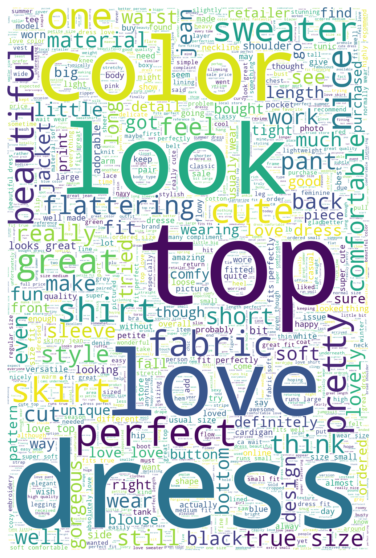

In [27]:
"""
Reference from Ken Jee : https://github.com/PlayingNumbers/ds_salary_proj
"""
words = " ".join(df['Title-Review Text'][df['Review']=="positive"])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)


text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

The words like love, top, perfect, great, etc are used for positive reviews 

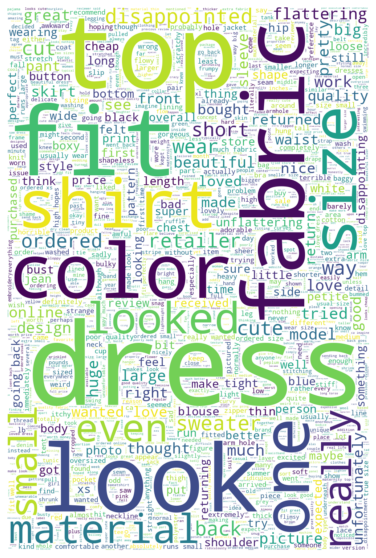

In [28]:
words = " ".join(df['Title-Review Text'][df['Review']=="negative"])

words_filtered = punctuation_stop(words)


text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

Here we can see that there are word which look like complaint like fitting, material, look, size, etc are used

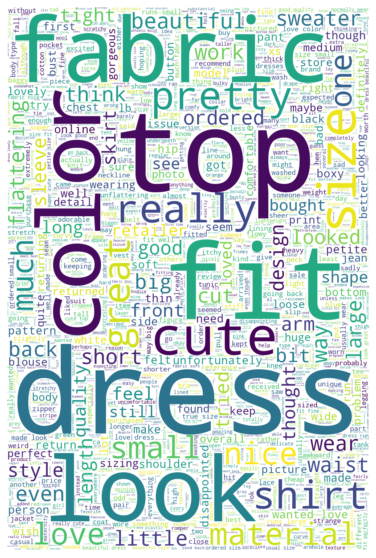

In [29]:
words = " ".join(df['Title-Review Text'][df['Review']=="neutral"])

words_filtered = punctuation_stop(words)


text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

This look like it has both complain as well as compliments

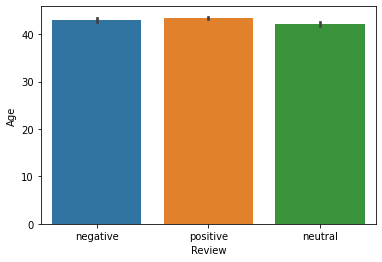

In [30]:
sns.barplot(x="Review",y="Age",data=df)

looks like people of every age has reviewd equally at an average

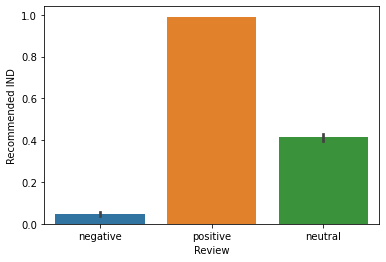

In [31]:
sns.barplot(x="Review",y="Recommended IND",data=df)

as we know that when the review are positive tend to recommend more then neutral then negative

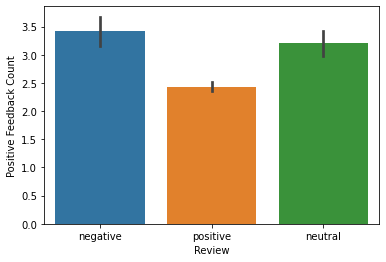

In [32]:
sns.barplot(x="Review",y="Positive Feedback Count",data=df)

we can see that positive feedback count vary slightly

# Data Preprocessing

In [33]:
df.reset_index(drop=True,inplace=True)

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df.loc[i,'Title-Review Text'])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [35]:
df['Title-Review Text']=corpus

In [36]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title-Review Text', 'Review'],
      dtype='object')

In [37]:
df['Review']=df['Review'].apply(lambda x:0 if x=="negative" else(2 if x=='positive' else(1 if x=='neutral' else x)))

In [38]:
#df=df.sort_values("Clothing ID")
#df.reset_index(drop=True,inplace=True)

In [39]:
words=df['Title-Review Text']
y=df['Review']

In [40]:
#words

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=3000,ngram_range=(1,3))
words=tfidf_v.fit_transform(words).toarray()

In [42]:
X_train=words[:18111]
X_test=words[18111:]
y_train=y[:18111].values
y_test=y[18111:].values

In [43]:
#pd.DataFrame(words).to_csv("words.csv")

# ML Algorithms

## Gaussian Naive bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred=classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.22      0.70      0.33       499
           1       0.20      0.30      0.24       607
           2       0.95      0.57      0.71      3424

    accuracy                           0.54      4530
   macro avg       0.46      0.52      0.43      4530
weighted avg       0.77      0.54      0.60      4530



## Multinominal Naive bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [48]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.80      0.32      0.46       499
           1       0.44      0.15      0.22       607
           2       0.82      0.99      0.90      3424

    accuracy                           0.80      4530
   macro avg       0.68      0.49      0.53      4530
weighted avg       0.77      0.80      0.76      4530



## Logistics Regression

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [50]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.49      0.60      0.54       499
           1       0.33      0.48      0.39       607
           2       0.95      0.84      0.89      3424

    accuracy                           0.77      4530
   macro avg       0.59      0.64      0.61      4530
weighted avg       0.82      0.77      0.79      4530



## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.70      0.26      0.38       499
           1       0.41      0.05      0.09       607
           2       0.79      0.99      0.88      3424

    accuracy                           0.78      4530
   macro avg       0.63      0.43      0.45      4530
weighted avg       0.73      0.78      0.72      4530



## XGboost

In [53]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.64      0.44      0.52       499
           1       0.39      0.19      0.25       607
           2       0.85      0.97      0.91      3424

    accuracy                           0.81      4530
   macro avg       0.63      0.53      0.56      4530
weighted avg       0.77      0.81      0.78      4530



###### As logistic regression has a better accuracy w.r.t 0 and 1 we will use logistic regression

In [55]:
#from imblearn.combine import SMOTETomek

In [56]:
#smk = SMOTETomek(random_state=42)

In [57]:
#X_train_res,y_train_res=smk.fit_sample(X_train,y_train)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced')

In [59]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
print("Classification Report:\n ", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

           0       0.49      0.60      0.54       499
           1       0.33      0.48      0.39       607
           2       0.95      0.84      0.89      3424

    accuracy                           0.77      4530
   macro avg       0.59      0.64      0.61      4530
weighted avg       0.82      0.77      0.79      4530



## Prediction Using Bidirectional LSTM

In [136]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [137]:
voc_size=5000

In [138]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [139]:
sent_length=70
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...   72 1342 3409]
 [   0    0    0 ...  700 2528 3818]
 [   0    0    0 ... 4309  694 1711]
 ...
 [   0    0    0 ...  513 1257 4063]
 [   0    0    0 ... 4225 1711 1711]
 [   0    0    0 ... 2742  855 3339]]


In [140]:
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.33))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 70, 50)            250000    
_________________________________________________________________
dropout_26 (Dropout)         (None, 70, 50)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 70, 200)           120800    
_________________________________________________________________
dropout_27 (Dropout)         (None, 70, 200)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               240800    
_________________________________________________________________
dropout_28 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)               

In [141]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [143]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
238/238 [==============================] - 7s 29ms/step - loss: 0.5269 - accuracy: 0.7950 - val_loss: 0.4355 - val_accuracy: 0.8133
Epoch 2/10
238/238 [==============================] - 6s 26ms/step - loss: 0.3974 - accuracy: 0.8330 - val_loss: 0.4766 - val_accuracy: 0.8109
Epoch 3/10
238/238 [==============================] - 6s 25ms/step - loss: 0.3626 - accuracy: 0.8468 - val_loss: 0.4605 - val_accuracy: 0.8092
Epoch 4/10
238/238 [==============================] - 6s 25ms/step - loss: 0.3404 - accuracy: 0.8597 - val_loss: 0.4450 - val_accuracy: 0.8169
Epoch 5/10
238/238 [==============================] - 6s 25ms/step - loss: 0.3046 - accuracy: 0.8777 - val_loss: 0.4724 - val_accuracy: 0.8209
Epoch 6/10
238/238 [==============================] - 6s 26ms/step - loss: 0.2813 - accuracy: 0.8854 - val_loss: 0.5149 - val_accuracy: 0.7847
Epoch 7/10
238/238 [==============================] - 6s 25ms/step - loss: 0.2840 - accuracy: 0.8878 - val_loss: 0.5357 - val_accuracy: 0.8093

In [144]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8159796573875803

In [145]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       770
           1       0.40      0.34      0.37       949
           2       0.90      0.94      0.92      5753

    accuracy                           0.82      7472
   macro avg       0.62      0.59      0.60      7472
weighted avg       0.80      0.82      0.81      7472



#### Here we can see that the f1 score of 0 and 1 has been improved